## Load Dataset

In [3]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [5]:
df.drop("Loan_ID", axis=1, inplace=True)
# Checking the Missing Values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Task1 deal with NULL rows, you can either choose to drop them or replace them with mean or other value 
df=df.dropna()
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Encode 

In [5]:
df.Gender.value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [6]:
df.Married.value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [7]:
df.Education.value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [8]:
df.Self_Employed.value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

In [9]:
df.Property_Area.value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [10]:
df.Loan_Status.value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [11]:
df.Dependents.value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [12]:
# Task2 deal with categorical features
df.Gender=df.Gender.map({'Male':1,'Female':0})
df.Married=df.Married.map({'Yes':1,'No':0})
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df.Property_Area=df.Property_Area.map({'Semiurban':0,'Urban':1,'Rural':2})
df.Loan_Status=df.Loan_Status.map({'Y':1,'N':0})
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int64  
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 48.8 KB


In [14]:
df=df.astype("float64")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,2.0,0.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,1.0,1.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,1.0,1.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,1.0,1.0
5,1.0,1.0,2.0,1.0,1.0,5417.0,4196.0,267.0,360.0,1.0,1.0,1.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    float64
 1   Married            480 non-null    float64
 2   Dependents         480 non-null    float64
 3   Education          480 non-null    float64
 4   Self_Employed      480 non-null    float64
 5   ApplicantIncome    480 non-null    float64
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    float64
 11  Loan_Status        480 non-null    float64
dtypes: float64(12)
memory usage: 48.8 KB


In [16]:
fun_std=lambda data:(data - data.mean()) / data.std()
df.ApplicantIncome = fun_std(df.ApplicantIncome)
df.CoapplicantIncome = fun_std(df.CoapplicantIncome)
df.LoanAmount = fun_std(df.LoanAmount)
df.Loan_Amount_Term = fun_std(df.Loan_Amount_Term)
df.Dependents = fun_std(df.Dependents)
df.Property_Area=fun_std(df.Property_Area)

In [17]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,0.218371,1.0,0.0,-0.137826,-0.027923,-0.207872,0.275254,1.0,1.346853,0.0
2,1.0,1.0,-0.761238,1.0,1.0,-0.417101,-0.604003,-0.977981,0.275254,1.0,0.131647,1.0
3,1.0,1.0,-0.761238,0.0,0.0,-0.490668,0.296791,-0.307241,0.275254,1.0,0.131647,1.0
4,1.0,0.0,-0.761238,1.0,0.0,0.112163,-0.604003,-0.046398,0.275254,1.0,0.131647,1.0
5,1.0,1.0,1.197981,1.0,1.0,0.009310,0.998936,1.518661,0.275254,1.0,0.131647,1.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    float64
 1   Married            480 non-null    float64
 2   Dependents         480 non-null    float64
 3   Education          480 non-null    float64
 4   Self_Employed      480 non-null    float64
 5   ApplicantIncome    480 non-null    float64
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    float64
 11  Loan_Status        480 non-null    float64
dtypes: float64(12)
memory usage: 48.8 KB


## Data process

In [19]:
# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization
#df.head().values
df.Loan_Status.value_counts()

1.0    332
0.0    148
Name: Loan_Status, dtype: int64

In [20]:
df=df.sort_values(by='Loan_Status',ascending=False)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
303,1.0,1.0,0.218371,1.0,0.0,-0.659680,0.084772,-0.605348,0.275254,1.0,0.131647,1.0
292,1.0,1.0,1.197981,1.0,0.0,-0.390108,-0.008058,-0.133346,0.275254,1.0,0.131647,1.0
306,0.0,0.0,-0.761238,1.0,0.0,-0.282668,0.032436,-0.120925,0.275254,1.0,1.346853,1.0
304,1.0,0.0,-0.761238,1.0,0.0,-0.240679,0.351037,-0.058819,0.275254,1.0,1.346853,1.0
2,1.0,1.0,-0.761238,1.0,1.0,-0.417101,-0.604003,-0.977981,0.275254,1.0,0.131647,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.0,1.0,-0.761238,1.0,0.0,-0.181931,0.332318,-0.431452,0.275254,1.0,0.131647,0.0
340,1.0,1.0,2.177591,0.0,0.0,-0.479377,0.002256,0.351077,0.275254,1.0,1.346853,0.0
341,0.0,0.0,-0.761238,1.0,0.0,-0.526835,-0.604003,-1.226403,0.275254,1.0,1.346853,0.0
351,1.0,0.0,-0.761238,1.0,0.0,0.597322,0.987857,2.027926,0.275254,1.0,1.346853,0.0


In [21]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
303,1.0,1.0,0.218371,1.0,0.0,-0.659680,0.084772,-0.605348,0.275254,1.0,0.131647,1.0
292,1.0,1.0,1.197981,1.0,0.0,-0.390108,-0.008058,-0.133346,0.275254,1.0,0.131647,1.0
306,0.0,0.0,-0.761238,1.0,0.0,-0.282668,0.032436,-0.120925,0.275254,1.0,1.346853,1.0
304,1.0,0.0,-0.761238,1.0,0.0,-0.240679,0.351037,-0.058819,0.275254,1.0,1.346853,1.0
2,1.0,1.0,-0.761238,1.0,1.0,-0.417101,-0.604003,-0.977981,0.275254,1.0,0.131647,1.0


In [22]:

X1=df[0:249].values
X2=df[332:443].values
y1=X1[:,-1:]
y2=X2[:,-1:]
X3=X1[:,0:11]
X4=X2[:,0:11]
X_train=np.concatenate((X3, X4), axis=0)
y_train=np.concatenate((y1,y2),axis=0)


In [23]:
X1=df[249:332].values
X2=df[443:].values
y1=X1[:,-1:]
y2=X2[:,-1:]
X3=X1[:,0:11]
X4=X2[:,0:11]
X_test=np.concatenate((X3, X4), axis=0)
y_test=np.concatenate((y1,y2),axis=0)


## Train

In [24]:
# Task4 train your model and plot the loss curve of training
from Logistic import LogisticRegression

all right


In [25]:
model=LogisticRegression()
b=model.fit(X_train,y_train)
print(b)

iterative error:
9.931954528386212e-08
[[-0.12764599]
 [ 0.63808852]
 [ 0.14707576]
 [ 0.55864518]
 [ 0.01046668]
 [-0.17360225]
 [-0.16366892]
 [-0.23202107]
 [-0.10077419]
 [ 3.99012804]
 [-0.25552962]
 [-3.32349578]]


In [26]:
data=model.predict(X_test,y_test,b)
print(data)

{'TP': 80, 'FN': 3, 'FP': 19, 'TN': 18}


In [86]:
def sigmoid(x):
        """The logistic sigmoid function"""
        y=1./(1.+np.exp(-x))
        return(y)

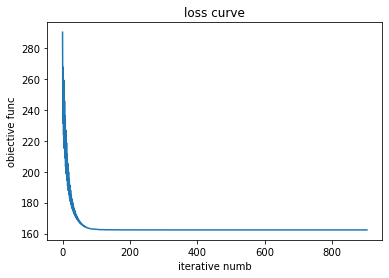

In [87]:
def fun( X, y, lr=0.01, tol=1e-7, max_iter=100000):

        X=np.mat(X)
        y=np.mat(y)
        m,d=np.shape(X)
        b=np.zeros(shape=(d+1,1))
        a=np.ones((m,1),dtype="double")
        X=np.concatenate((X,a),axis=1)
        count=1.
        Loss_curve=[]
        while  count<=max_iter:
            count+=1.
            b_div=-(X.T)@(y-sigmoid(X@b))
            b_div=b_div*lr
            if np.linalg.norm(b_div) <=tol:
                break
            else:
                b=b-b_div 
                loss=0  
                for i in range(m):
                    loss+=(-y[i]*(X[i]@b)+np.log(1+np.exp(X[i]@b)))[0,0]
                Loss_curve.append(loss)
        plt.plot(Loss_curve)
        plt.xlabel('iterative numb')
        plt.ylabel('obiective func')
        plt.title('loss curve')
        plt.show()
fun(X_train,y_train)

## Test

In [29]:
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with
model=LogisticRegression()
b_1=model.fit(X_train,y_train,lr=0.01,tol=1e-10)
print(b_1)

iterative error:
9.974024410080648e-11
[[-0.12764505]
 [ 0.63808889]
 [ 0.14707573]
 [ 0.55864627]
 [ 0.01046701]
 [-0.17360236]
 [-0.16366903]
 [-0.23202124]
 [-0.1007743 ]
 [ 3.99013206]
 [-0.25552964]
 [-3.3235015 ]]


In [30]:
data_1=model.predict(X_test,y_test,b_1)
print(data_1)

{'TP': 80, 'FN': 3, 'FP': 19, 'TN': 18}
